<h1><center>MNIST classification using Numpy<center></h1>

## by: José Lucas Barretto and Lucas Celinga Agrizzi

## Importing Numpy and Keras

In [1]:
import numpy as np
import tensorflow as tf
import keras
# print("Using tensorflow version " + str(tf.__version__))
# print("Using keras version " + str(keras.__version__))

/home/lucasagrizzi/anaconda3/envs/py37/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/lucasagrizzi/anaconda3/envs/py37/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/lucasagrizzi/anaconda3/envs/py37/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/lucasagrizzi/anaconda3/envs/

## Loading and preparing the MNIST dataset
Load the MNIST dataset made available by keras.datasets. Check the size of the training and testing sets. 

In [2]:
# The MNSIT dataset is ready to be imported from Keras into RAM
# Warning: you cannot do that for larger databases (e.g., ImageNet)

(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data(path="mnist.npz")
print('train data format - X:', train_images.shape, ', y:', train_labels.shape)
print('test data format - X:', test_images.shape, ', y:', test_labels.shape)

train data format - X: (60000, 28, 28) , y: (60000,)
test data format - X: (10000, 28, 28) , y: (10000,)


The MNIST database contains 60,000 training images and 10,000 testing images.
Using the pyplot package, visualize the first sample of the training set:

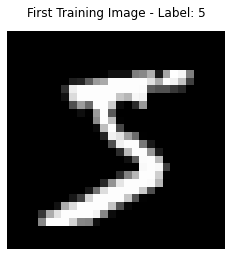

In [3]:
# Let us visualize the first training sample using the Matplotlib library
from matplotlib import pyplot as plt

plt.figure()
plt.title('First Training Image - Label: ' + str(train_labels[0]), pad=15)
plt.imshow(train_images[0], cmap='gray')
plt.axis('off')
plt.show()

The database contains images of handwritten digits. Hence, they belong to one of 10 categories, depending on the digit they represent. 
Reminder: in order to do multi-class classification, we use the softmax function, which outputs a multinomial probability distribution. That means that the output to our model will be a vector of size $10$, containing probabilities (meaning that the elements of the vector will be positive sum to $1$).
For easy computation, we want to true labels to be represented with the same format: that is what we call **one-hot encoding**. For example, if an image $\mathbf{x}$ represents the digit $5$, we have the corresponding one_hot label (careful, $0$ will be the first digit): 
$$ \mathbf{y} = [0, 0, 0, 0, 0, 1, 0, 0, 0, 0] $$
Here, you need to turn train and test labels to one-hot encoding using the following function: 

In [4]:
from keras.utils.np_utils import to_categorical

num_categories = 10

train_labels = to_categorical(train_labels, num_categories)
test_labels = to_categorical(test_labels, num_categories)

Images are black and white, with size $28 \times 28$. We will work with them using a simple linear classification model, meaning that we will have them as vectors of size $(784)$.
You should then transform the images to the size $(784)$ using the numpy function ```reshape```.

Then, after casting the pixels to floats, normalize the images so that they have zero-mean and unitary deviation. Be careful to your methodology: while you have access to training data, you may not have access to testing data, and must avoid using any statistic on the testing dataset.

In [5]:
# Reshape to proper images with 1 color channel according to backend scheme
train_images = train_images.reshape(len(train_images), -1)
test_images = test_images.reshape(len(test_images), -1)

# Cast pixels from uint8 to float32
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

# Now let us normalize the images so that they have zero mean and standard deviation
# Hint: are real testing data statistics known at training time ? Answer: NO

eps = 1e-7

# calculate statistics from training data
mean = np.mean(train_images)
std = np.std(train_images) + eps # sum eps to avoid division by zero

# normalize using training data statistics - avoids data leakage
normal_train_images = (train_images - mean)/std
normal_test_images = (test_images - mean)/std

# Working with Numpy

Look at this [cheatsheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Numpy_Python_Cheat_Sheet.pdf) for some basic information on how to use numpy.

## Defining the model 

We will here create a simple, linear classification model. We will take each pixel in the image as an input feature (making the size of the input to be $784$) and transform these features with a weight matrix $\mathbf{W}$ and a bias vector $\mathbf{b}$. Since there is $10$ possible classes, we want to obtain $10$ scores. Then, 
$$ \mathbf{W} \in \mathbb{R}^{784 \times 10} $$
$$ \mathbf{b} \in \mathbb{R}^{10} $$

and our scores are obtained with:
$$ \mathbf{z} = \mathbf{W}^{T} \mathbf{x} +  \mathbf{b} $$

where $\mathbf{x} \in \mathbb{R}^{784}$ is the input vector representing an image.
We note $\mathbf{y} \in \mathbb{R}^{10}$ as the target one_hot vector. 

Here, you fist need to initialize $\mathbf{W}$ and $\mathbf{b}$ using ```np.random.normal``` and ```np.zeros```, then compute $\mathbf{z}$.

In [6]:
# To avoid implementing a complicated gradient back-propagation,
# we will try a very simple architecture with one layer 
def initLayer(n_input,n_output):
    """
    Initialize the weights, return the number of parameters
    Inputs: n_input: the number of input units - int
          : n_output: the number of output units - int
    Outputs: W: a matrix of weights for the layer - numpy ndarray
           : b: a vector bias for the layer - numpy ndarray
           : nb_params: the number of parameters  - int
    """
    
    W = np.random.normal(size=(n_input,n_output))
    b = np.zeros(n_output)
    b.reshape(n_output)
    
    nb_params = n_input*n_output + n_output
    
    return W, b, nb_params

In [7]:
n_training = train_images.shape[0] 
n_feature = train_images.shape[1]
n_labels = 10
W, b, nb_params = initLayer(n_feature, n_labels)

In [8]:
# see the shapes
print('W shape:', W.shape)
print('b shape:', b.shape)
print('train images shape:', normal_train_images.shape)

W shape: (784, 10)
b shape: (10,)
train images shape: (60000, 784)


In [9]:
def forward(W, b, X):
    """
    Perform the forward propagation
    Inputs: W: the weights - numpy ndarray
          : b: the bias - numpy ndarray
          : X: the batch - numpy ndarray
    Outputs: z: outputs - numpy ndarray
    """
    z = X @ W + b # CODE HERE
    return z

In [10]:
z = forward(W, b, train_images)
print('z shape:', z.shape)

z shape: (60000, 10)


## Computing the output 

To obtain classification probabilities, we use the softmax function:
$$ \mathbf{o} = softmax(\mathbf{z}) \text{         with          } o_i = \frac{\exp(z_i)}{\sum_{j=0}^{9} \exp(z_j)} $$

The usual difficulty with the softmax function is the possibility of overflow when the scores $z_i$ are already large. Since a softmax is not affected by a shift affecting the whole vector $\mathbf{z}$:
$$ \frac{\exp(z_i - c)}{\sum_{j=0}^{9} \exp(z_j - c)} =  \frac{\exp(c) \exp(z_i)}{\exp(c) \sum_{j=0}^{9} \exp(z_j)} = \frac{\exp(z_i)}{\sum_{j=0}^{9} \exp(z_j)}$$
what trick can we use to ensure we will not encounter any overflow ? 

In [11]:
def softmax(z):
    """
    Perform the softmax transformation to the pre-activation values
    Inputs: z: the pre-activation values - numpy ndarray
    Outputs: out: the activation values - numpy ndarray
    """
    c = z.max()
    exp_z = np.exp(z-c)
    out = exp_z/np.sum(exp_z)# CODE HERE
    return out

## Making updates

We define a learning rate $\eta$. The goal is to be able to apply updates:
$$ \mathbf{W}^{t+1} = \mathbf{W}^{t} - \nabla_{\mathbf{W}} l_{ML} $$

In order to do this, we will compute this gradient (and the bias) in the function ```update```. In the next function ```updateParams```, we will actually apply the update with regularization. 

Reminder: the gradient $\nabla_{\mathbf{W}} l_{ML}$ is the matrix containing the partial derivatives 
$$ \left[\frac{\delta l_{ML}}{\delta W_{ij}}\right]_{i=1..784, j=1..10} $$


Coordinate by coordinate, we obtain the following update: 
$$ W_{ij}^{t+1} = W_{ij}^{t} - \frac{\delta l_{ML}}{\delta W_{ij}} $$

Via the chain rule, we obtain, for an input feature $i \in [0, 783]$ and a output class $j \in [0, 9]$: $$\frac{\delta l_{ML}}{\delta W_{ij}} = \frac{\delta l_{ML}}{\delta z_{j}} \frac{\delta z_j}{\delta W_{ij}}$$ 

It's easy to compute that $\frac{\delta z_j}{\delta W_{ij}} = x_i$

We compute the softmax derivative, to obtain:
$$ \nabla_{\mathbf{z}} l_{ML} = \mathbf{o} - \mathbf{y} $$

Hence, $\frac{\delta l_{ML}}{\delta z_{j}} = o_j - y_j$ and we obtain that $$\frac{\delta l_{ML}}{\delta W_{ij}} = (o_j - y_j) x_i$$

This can easily be written as a scalar product, and a similar computation (even easier, actually) can be done for $\mathbf{b}$. Noting $\nabla_{\mathbf{z}} l_{ML} = \mathbf{o} - \mathbf{y}$ as ```grad``` in the following function, compute the gradients $\nabla_{\mathbf{W}} l_{ML}$ and $\nabla_{\mathbf{b}} l_{ML}$ in order to call the function ```updateParams```.

Note: the regularizer and the weight_decay $\lambda$ are used in ```updateParams```.

In [12]:
def update(eta, W, b, grad, X, regularizer, weight_decay):
    """
    Perform the update of the parameters
    Inputs: eta: the step-size of the gradient descent - float 
          : W: the weights - ndarray
          : b: the bias -  ndarray
          : grad: the gradient of the activations w.r.t. to the loss -  list of ndarray
          : X: the data -  ndarray
          : regularizer: 'L2' or None - the regularizer to be used in updateParams
          : weight_decay: the weight decay to be used in updateParams - float
    Outputs: W: the weights updated -  ndarray
           : b: the bias updated -  ndarray
    """  
   
    grad_w = X.reshape((-1,1)) @ grad.reshape((-1,1)).T # CODE HERE
    grad_b = grad # CODE HERE
        
    W = updateParams(W, grad_w, eta, regularizer, weight_decay)
    b = updateParams(b, grad_b, eta, regularizer, weight_decay)
    return W, b

The update rule is affected by regularization. We implement two cases: No regularization, or L2 regularization. Use the two possible update rules to implement the following function:

In [13]:
def updateParams(param, grad_param, eta, regularizer=None, weight_decay=0.):
    """
    Perform the update of the parameters
    Inputs: param: the network parameters - ndarray
          : grad_param: the updates of the parameters - ndarray
          : eta: the step-size of the gradient descent - float
          : weight_decay: the weight-decay - float
    Outputs: the parameters updated - ndarray
    """
    if regularizer==None:
        return param - eta*grad_param # CODE HERE
    elif regularizer=='L2':
        return (1-2*weight_decay)*param - eta*grad_param # CODE HERE
    else:
        raise NotImplementedError

## Computing the Accuracy

Here, we simply use the model to predict the class (by taking the argmax of the output !) for every example in ```X```, and count the number of times the model is right, to output the accuracy.

In [14]:
def computeAcc(W, b, X, labels):
    """
    Compute the loss value of the current network on the full batch
    Inputs: act_func: the activation function - function
          : W: the weights - list of ndarray
          : B: the bias - list of ndarray
          : X: the batch - ndarray
          : labels: the labels corresponding to the batch
    Outputs: loss: the negative log-likelihood - float
           : accuracy: the ratio of examples that are well-classified - float
    """ 

    ### Forward propagation
    z = forward(W, b, X)# CODE HERE

    ### Compute the softmax and the prediction
    out = softmax(z)# CODE HERE

    pred = np.argmax(out, axis=1)# CODE HERE
    ans = np.argmax(labels, axis=1)

    ### Compute the accuracy
    accuracy = np.mean(pred==ans) # CODE HERE

    return accuracy

## Preparing training

The following hyperparameters are given. Next, we can assemble all the function previously defined to implement a training loop. We will train the classifier on **one epoch**, meaning that the model will see each trainin example once. 

In [15]:
# Optimization
eta = 0.01
regularizer = 'L2'
weight_decay = 0.0001

# Training
log_interval = 3000

In [16]:
print('Accuracy table over iterations:\n')
print('iteration\ttrain_acc\tvalid_acc\tlearning_rate')
# Data structures for plotting
g_train_acc=[]
g_valid_acc=[]

# init weights
W, b, nb_params = initLayer(n_feature, n_labels)

#######################
### Learning process ##
#######################
for j in range(n_training):
    
    ### Getting the example
    X = normal_train_images[j].reshape((1,-1))  
    y = train_labels[j].reshape((1,-1)) # CODE HERE

    ### Forward propagation
    z = forward(W, b, X) # CODE HERE
    
    ### Compute the softmax
    out = softmax(z)# CODE HERE

    ### Compute the gradient at the top layer
    derror = out - y # This is o - y 

    ### Update the parameters
    W, b = update(eta, W, b, derror.reshape(-1,), X, regularizer, weight_decay)# CODE HERE

    if j % log_interval == 0:
        
        ### Every log_interval examples, look at the training accuracy
        train_accuracy = computeAcc(W, b, normal_train_images, train_labels) 

        ### And the testing accuracy
        test_accuracy = computeAcc(W, b, normal_test_images, test_labels) 

        g_train_acc.append(train_accuracy)
        g_valid_acc.append(test_accuracy)
        result_line = str(int(j)) + "\t\t" + str(train_accuracy)[:6] + "\t\t" + str(test_accuracy)[:6] + "\t\t" + str(eta)
        print(result_line)

# calcule the acc for the last point
train_accuracy = computeAcc(W, b, normal_train_images, train_labels)
valid_accuracy = computeAcc(W, b, normal_test_images, test_labels)

g_train_acc.append(train_accuracy)
g_valid_acc.append(valid_accuracy)
result_line = "Final result:" + "\n\t\t" + str(train_accuracy)[:6] + "\t\t" + str(valid_accuracy)[:6] + "\t\t" + str(eta)
print('\n',result_line) 

# Find best training fit 
index_max = np.argmax(g_valid_acc)
best_line = "Best result:" + "\n" + str(index_max*log_interval) + "\t\t" + str(g_train_acc[index_max])[:6] + "\t\t" + str(g_valid_acc[index_max])[:6] + "\t\t" + str(eta)
print('\n',best_line) 

Accuracy table over iterations:

iteration	train_acc	valid_acc	learning_rate
0		0.0906		0.083		0.01
3000		0.789		0.7914		0.01
6000		0.8256		0.8347		0.01
9000		0.8126		0.8097		0.01
12000		0.8300		0.8324		0.01
15000		0.8222		0.8189		0.01
18000		0.8379		0.8421		0.01
21000		0.7855		0.7954		0.01
24000		0.8248		0.8338		0.01
27000		0.8321		0.8382		0.01
30000		0.7964		0.7985		0.01
33000		0.7995		0.8045		0.01
36000		0.7485		0.7532		0.01
39000		0.8302		0.8319		0.01
42000		0.8010		0.8021		0.01
45000		0.8520		0.8546		0.01
48000		0.8350		0.8393		0.01
51000		0.838		0.8467		0.01
54000		0.7605		0.7683		0.01
57000		0.8082		0.8202		0.01

 Final result:
		0.7576		0.756		0.01

 Best result:
45000		0.8520		0.8546		0.01


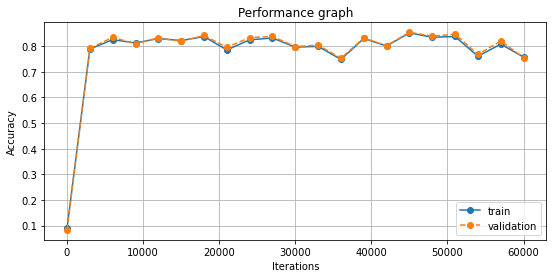

In [17]:
# Print the accuracy as a performance measure
x = np.arange(len(g_train_acc))*log_interval

plt.figure(figsize=(9,4))
plt.plot(x, g_train_acc, '-o', label='train')
plt.plot(x, g_valid_acc, '--o', label='validation')

plt.title('Performance graph')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()
plt.show()

#### What can you say about the performance of this simple linear classifier ? 

The classifier can achieve for some points, more than 80% of accuracy for the parameters recommended. As we can not affirm that the function is convex, we can find some local minimums. We can notice that the function is not convex because the stochastic gradient descent does not make the accuracy arrive in a stable point. Because of this, we can notice that the best model, considering only the test set as the metric of accuracy, could not be the last point.

In the project, we achieve the final accuracy around 75%, but the best accuracy of the model was around 85%. Furthermore, as the two accuracies run over the same sample, we see that the model classifies better for a specific point during the learning.


To better adapt to this problem, we usually try to avoid local minimum optimizing the learning rate and weight_decay hyperparameters or going to more complex architectures.